In [3]:
%pip install ISLP

import ISLP

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install scikit-learn statsmodels

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
%pip install pyglmnet

from pyglmnet import GLM

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.cross_decomposition import PLSRegression


In [14]:
# Prepare data
College = ISLP.load_data('College')


In [16]:
import numpy as np

np.random.seed(123)
train = np.random.choice(College.index, size=len(College)//2, replace=False)
test = College.index.difference(train)
train_data = College.loc[train]
test_data = College.loc[test]

(a) Subset Selection

In [19]:

import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector

# Prepare X and y
X = train_data.drop(columns=['Apps'])
y = train_data['Apps']

# Convert categorical variable to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Use LinearRegression for subset selection
lr = LinearRegression()

# Perform forward selection (you can also use direction='backward')
sfs = SequentialFeatureSelector(lr, n_features_to_select=10, direction='forward')
sfs.fit(X, y)

# Get selected features
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['Accept', 'Top10perc', 'Outstate', 'Room.Board', 'Books', 'Personal',
       'PhD', 'Terminal', 'Grad.Rate', 'Private_Yes'],
      dtype='object')


(b) Ridge Regression

In [20]:
from sklearn.linear_model import RidgeCV
import pandas as pd

# Prepare X and y for ridge regression
X_ridge = pd.get_dummies(College.drop(columns=['Apps']), drop_first=True)
y_ridge = College['Apps']

# Split into train and test using the indices
X_train_ridge = X_ridge.loc[train]
y_train_ridge = y_ridge.loc[train]

# Ridge regression with cross-validation
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge_cv.fit(X_train_ridge, y_train_ridge)

print("Best alpha (lambda) for Ridge:", ridge_cv.alpha_)

Best alpha (lambda) for Ridge: 0.001


(c) Lasso Regression

In [21]:
from sklearn.linear_model import LassoCV

# Prepare X and y for lasso regression (already done in previous cells)
# X and y are your training data

lasso_cv = LassoCV(alphas=None, cv=5, random_state=123)
lasso_cv.fit(X, y)

best_alpha_lasso = lasso_cv.alpha_
lasso_coef = lasso_cv.coef_

print("Best alpha (lambda) for Lasso:", best_alpha_lasso)
print("Lasso coefficients:", lasso_coef)

Best alpha (lambda) for Lasso: 247752.75721160593
Lasso coefficients: [ 1.11394676  0.          0.          0.          0.13209825 -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.11236631  0.         -0.        ]


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:1632: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(


(d) PCR

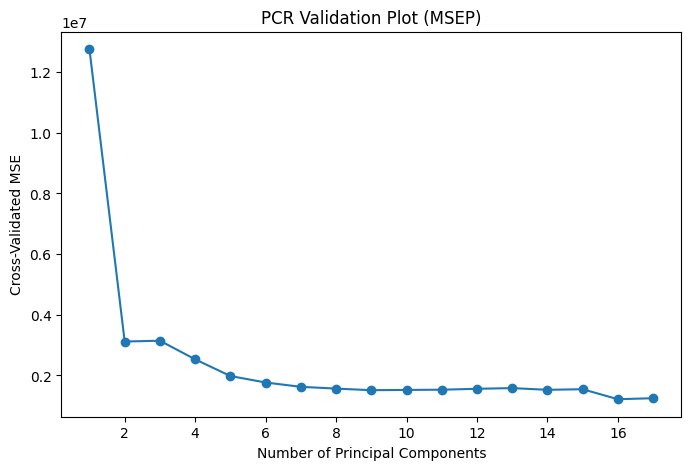

In [22]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Prepare X and y for PCR
X_pcr = pd.get_dummies(train_data.drop(columns=['Apps']), drop_first=True)
y_pcr = train_data['Apps']

# Standardize the predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pcr)

# Try different numbers of principal components and record cross-validated MSE
mse = []
n_components_range = range(1, X_scaled.shape[1] + 1)
for n in n_components_range:
	pca = PCA(n_components=n)
	X_pca = pca.fit_transform(X_scaled)
	lr = LinearRegression()
	# Negative MSE, so we take the negative to get positive MSE
	scores = cross_val_score(lr, X_pca, y_pcr, scoring='neg_mean_squared_error', cv=5)
	mse.append(-scores.mean())

# Plot validation curve (MSEP)
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, mse, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validated MSE')
plt.title('PCR Validation Plot (MSEP)')
plt.show()